# Data Preparation & Cleaning

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('Ecommerce_Consumer_Behavior_Analysis_Data.csv')

In [2]:
print(df.shape)

(1000, 28)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [4]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


## Handling null values

In [5]:
df.isnull().sum()

Customer_ID                                0
Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Pu

In [6]:
# Impute categorical variables with 'Unknown'
df['Social_Media_Influence'] = df['Social_Media_Influence'].fillna('Unknown')
df['Engagement_with_Ads'] = df['Engagement_with_Ads'].fillna('Unknown')

In [7]:
df.describe()

,Age,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.304000,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,7.547000
std,9.353238,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,4.035849
min,18.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.500000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


## Correct Data Types

In [8]:
# Convert date columns
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'])

In [9]:
df['Purchase_Amount'] = (
    df['Purchase_Amount']
    .astype(str)  # Convert to string first if it isn't already
    .str.replace(r'[\$,]', '', regex=True)  # Remove $ and commas
    .replace('', '0')  # Handle empty strings if any
    .astype(float)  # Final conversion to float
)


In [10]:
categorical_cols = ['Gender', 'Income_Level', 'Marital_Status', 'Education_Level', 'Occupation', 'Purchase_Category', 'Purchase_Channel', 'Social_Media_Influence',
                   'Discount_Sensitivity', 'Engagement_with_Ads', 'Device_Used_for_Shopping', 'Payment_Method', 'Purchase_Intent', 'Shipping_Preference']

In [11]:
import re
for col in categorical_cols:
    # 1. Standard cleaning version
    # Remove special characters keeping only alphanumeric and whitespace, plus $ and - characters
    df[col] = df[col].str.replace(r'[^\w\s\&\-]', '', regex=True)
    
    # Trim leading/trailing whitespace
    df[col] = df[col].str.strip()

    # Convert to lowercase for consistency
    df[col] = df[col].str.lower()


In [12]:
    # Verify unique values before conversion
for col in categorical_cols:
        print("Unique values after cleaning:")
        print(df[col].unique())

Unique values after cleaning:
['female' 'male' 'bigender' 'genderfluid' 'non-binary' 'polygender'
 'agender' 'genderqueer']
Unique values after cleaning:
['middle' 'high']
Unique values after cleaning:
['married' 'single' 'widowed' 'divorced']
Unique values after cleaning:
['bachelors' 'high school' 'masters']
Unique values after cleaning:
['middle' 'high']
Unique values after cleaning:
['gardening & outdoors' 'food & beverages' 'office supplies'
 'home appliances' 'furniture' 'books' 'sports & outdoors'
 'mobile accessories' 'luxury goods' 'animal feed' 'health care' 'hotels'
 'packages' 'electronics' 'software & apps' 'baby products' 'toys & games'
 'arts & crafts' 'health supplements' 'groceries' 'clothing'
 'beauty & personal care' 'travel & leisure flights'
 'jewelry & accessories']
Unique values after cleaning:
['mixed' 'in-store' 'online']
Unique values after cleaning:
['unknown' 'medium' 'low' 'high']
Unique values after cleaning:
['somewhat sensitive' 'not sensitive' 'very sen

In [13]:
# Convert categorical columns to category data type

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Customer_ID                            1000 non-null   object        
 1   Age                                    1000 non-null   int64         
 2   Gender                                 1000 non-null   category      
 3   Income_Level                           1000 non-null   category      
 4   Marital_Status                         1000 non-null   category      
 5   Education_Level                        1000 non-null   category      
 6   Occupation                             1000 non-null   category      
 7   Location                               1000 non-null   object        
 8   Purchase_Category                      1000 non-null   category      
 9   Purchase_Amount                        1000 non-null   float64  

## Outlier Detection

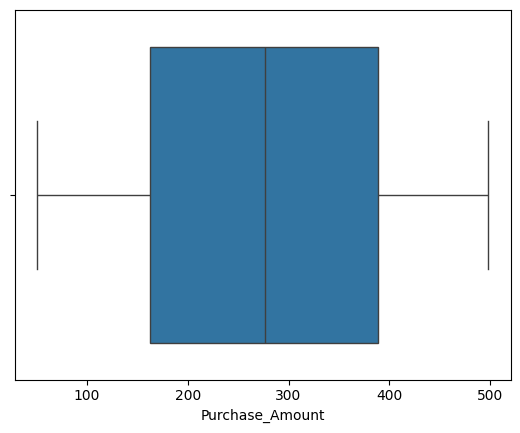

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers in Purchase_Amount
sns.boxplot(x=df['Purchase_Amount'])
plt.show()

## Save the Cleaned Dataset

In [16]:
# Save the cleaned dataset
df.to_csv('Ecommerce_Consumer_Behavior_cleaned_dataset.csv', index=False)